In [7]:
import os
import argparse
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
_datadir = 'data'

# read csv
lines = []
with open(os.path.join(_datadir, 'driving_log.csv')) as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)


In [4]:
# line fields: center,left,right,steering,throttle,brake,speed
def get_images_steerings(line):
    images = []
    steerings = []

    # center, left, right = line[0], line[1], line[2]
    source_paths = [line[i] for i in range(3)]
    # get file name
    source_paths = [x.split('/')[-1] for x in source_paths]
    # add the data directory path
    source_paths = [os.path.join(_datadir, 'IMG', x) for x in source_paths]
    imgs = [cv2.imread(x) for x in source_paths]
    img_center, img_left, img_right = imgs
    images.extend([img_center, img_left, img_right])

    steering_center = float(line[3])
    # correction of the steering angle for the side camera images
    correction = 0.2
    steering_left = steering_center + correction
    steering_right = steering_center - correction
    steerings.extend([steering_center, steering_left, steering_right])

    # add horizontal flipped images of each three images and nagated steering angles
    image_flips = [np.fliplr(x) for x in imgs]
    steering_flips = [-steering_center, -steering_left, -steering_right]
    images.extend(image_flips)
    steerings.extend(steering_flips)

    return images, steerings


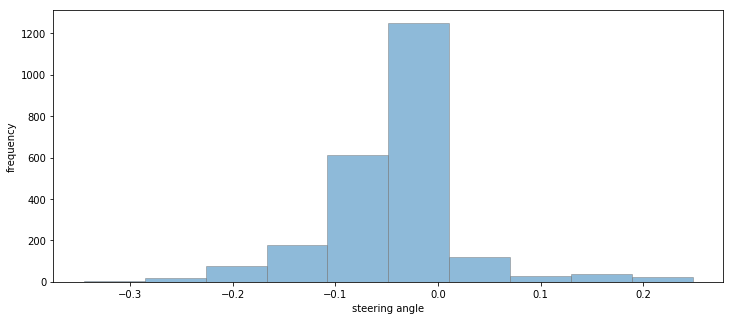

In [17]:
steerings = [float(line[3]) for line in lines]
plt.figure(figsize=(12,5))
plt.hist(steerings,alpha=0.5,edgecolor='gray')
plt.xlabel("steering angle")
plt.ylabel("frequency")
plt.show()
# plt.savefig('steerings.png', bbox_inches='tight')